
<h1>Activity 2 - UK ROAD ACCIDENT DATA ANALYTICS</h1>
<hr>
<h3>Analyst: Jessie O. Mompero Jr</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

<h2>DATABASE</h2>

In [2]:
accident_df = pd.read_csv('datasets\\uk_road_accident.csv')

In [3]:
accident_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>FILLING NULL VALUES</h2>

In [4]:
accident_df.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [5]:
accident_df['Latitude'] = accident_df['Latitude'].fillna(accident_df['Latitude'].mean())
accident_df['Longitude'] = accident_df['Longitude'].fillna(accident_df['Longitude'].mean())
accident_df['Road_Surface_Conditions'] = accident_df['Road_Surface_Conditions'].fillna('unaccounted')
accident_df['Road_Type'] = accident_df['Road_Type'].fillna('unaccounted')
accident_df['Urban_or_Rural_Area'] = accident_df['Urban_or_Rural_Area'].fillna(accident_df['Urban_or_Rural_Area'].mode()[0])
accident_df['Weather_Conditions'] = accident_df['Weather_Conditions'].fillna('unaccounted')
accident_df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>CORRECTING DATA TYPES</h2>

In [6]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [7]:
accident_df['Index'] = accident_df['Index'].astype('category')
accident_df['Accident_Severity'] = accident_df['Accident_Severity'].astype('category')
accident_df['Light_Conditions'] = accident_df['Light_Conditions'].astype('category')
accident_df['District Area'] = accident_df['District Area'].astype('category')
accident_df['Road_Surface_Conditions'] = accident_df['Road_Surface_Conditions'].astype('category')
accident_df['Road_Type'] = accident_df['Road_Type'].astype('category')
accident_df['Urban_or_Rural_Area'] = accident_df['Urban_or_Rural_Area'].astype('category')
accident_df['Weather_Conditions'] = accident_df['Weather_Conditions'].astype('category')
accident_df['Vehicle_Type'] = accident_df['Vehicle_Type'].astype('category')

<h1>CLEARING INCONSISTENCIES WITH THE DATA SET</h1>

In [8]:
accident_df['Accident Date'] = accident_df['Accident Date'].str.strip()
accident_df['Accident Date'] = accident_df['Accident Date'].astype('str')
accident_df['Accident Date'] = accident_df['Accident Date'].str.replace('/', '-')

In [9]:
accident_df['Accident Date'] = pd.to_datetime(accident_df['Accident Date'], dayfirst=True, errors = 'coerce')
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

<h1>EXTRACTING DATE INFORMATION USING PADAS DATE TIME</h1>

In [10]:
accident_df['Year'] = accident_df['Accident Date'].dt.year
accident_df['Month'] = accident_df['Accident Date'].dt.month
accident_df['Day'] = accident_df['Accident Date'].dt.day
accident_df['DayOfWeek'] = accident_df['Accident Date'].dt.dayofweek # Monda=0, Sunday

In [11]:
accident_df.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [12]:
accident_df

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unaccounted,Urban,unaccounted,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unaccounted,Urban,unaccounted,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


<h5>UniVariate</h5>
<h5>BiVariate</h5>
<h5>MultiVariate</h5>

<h1>1. What district area has the most accident when the road condition is dry from the year 2020?</h1>

In [13]:
twenty_df = accident_df[accident_df['Year'] == 2020]
twenty_df.groupby(['District Area', 'Road_Surface_Conditions']).size().sum()

np.int64(170591)

In [14]:
accident_df['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

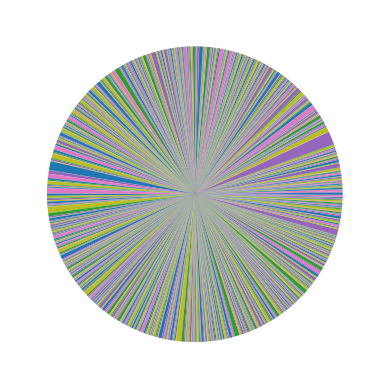

In [15]:
plt.pie(twenty_df.groupby(['District Area', 'Road_Surface_Conditions']).size())
plt.show()

<h2>Insight No 1</h2>
Insight: The Birmingham district has the most recorded accident with 13491 accident while the least is the Clackmannanshire with 91 accident.

<h1>2. Which district and what vehicle type has the highest average number of casualties per accident?</h1>

In [16]:
accident_df.groupby(['District Area', 'Vehicle_Type'])['Number_of_Casualties'].size().sort_values(ascending=False)

District Area  Vehicle_Type                
Birmingham     Car                             9600
Leeds          Car                             6875
Manchester     Car                             5248
Bradford       Car                             4749
Sheffield      Car                             4306
                                               ... 
Lincoln        Pedal cycle                        0
               Ridden horse                       0
Liverpool      Data missing or out of range       0
Teignbridge    Data missing or out of range       0
Harborough     Data missing or out of range       0
Name: Number_of_Casualties, Length: 6752, dtype: int64

<h2>Insight No 2</h2>
Insight: The Birmingham district with the car as vehicle type has the highest average number of casualties per accident.

<h1>3. What weather conditions has the most accident?</h1>

In [17]:
accident_df['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
unaccounted               14128
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h2>Insight No 3</h2>
Insight: The weather conditions that recorded with the most accident is fine no high winds, which means that the weather is fine and not even high winds with 535013 records.

<h1>4. Do accidents with more vehicles tend to occur in urban or rural areas?</h1>

In [18]:
accident_df.groupby(['Urban_or_Rural_Area'])['Number_of_Vehicles'].size().sort_values(ascending=False)

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: Number_of_Vehicles, dtype: int64

<h2>Insight No 4</h2>
Insight: The Urban ares has more vehicle accident with 421678 record compared to Rural areas with only 238990 record.

<h1>5. What vehicle type has the most accident?</h1>

In [19]:
accident_df['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h2>Insight No 5</h2>
Insight: The vehicle type with the most recorded accident is the Car, with its 497992 record which is so far away from the second one Van with only 34160.

<h1>6. Which road type is most associated with fatal accidents?</h1>

In [20]:
accident_df[accident_df['Accident_Severity'] == 'Fatal']['Road_Type'].value_counts()

Road_Type
Single carriageway    6527
Dual carriageway      1815
Roundabout             142
One way street          95
Slip road               49
unaccounted             33
Name: count, dtype: int64

<h2>Insight No 6</h2>
Insight: The road type that is most associated with the fatal accidents is Single carriageway with 6560 recorded.

<h1>7. Is there a correlation between weather conditions and accident severity?</h1>

In [21]:
accident_df['Number_of_Casualties'].corr(accident_df['Number_of_Vehicles'])

np.float64(0.22888886126927563)

<h2>Insight No 7</h2>
Insight: The result is below 0.5 which suggest that there are low possibility correlation between of weather conditions and accident severity.

<h1>8. What road surface condition has the most recorded accident?</h1>

In [22]:
accident_df['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
unaccounted                726
Name: count, dtype: int64

<h2>Insight No 8</h2>
Insight: The road surface condition that has the most recorded accident is Dry.

<h1>9. Which light condition is most common in serious accidents?</h1>

In [23]:
accident_df.groupby(['Light_Conditions', 'Accident_Severity']).size()

Light_Conditions             Accident_Severity
Darkness - lighting unknown  Fatal                    68
                             Serious                 794
                             Slight                 5622
Darkness - lights lit        Fatal                  1860
                             Serious               19130
                             Slight               108345
Darkness - lights unlit      Fatal                    45
                             Serious                 360
                             Slight                 2138
Darkness - no lighting       Fatal                  1612
                             Serious                7174
                             Slight                28651
Daylight                     Fatal                  5076
                             Serious               60759
                             Slight               419045
dtype: int64

In [24]:
accident_df[accident_df['Accident_Severity'] == 'Serious']['Light_Conditions'].mode()

0    Daylight
Name: Light_Conditions, dtype: category
Categories (5, object): ['Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight']

<h2>Insight No 9</h2>
Insight: The light codition with the most serious accidents is Daylight.

<h1>10. What road type has the most accident?</h1>

In [25]:
accident_df['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
unaccounted             4520
Name: count, dtype: int64

<h2>Insight No 10</h2>
Insight: The road type with the most record accident is Single carriageway.

<h1>11. What weather condition does car have the most accident?</h1>

In [26]:
accident_df[accident_df['Vehicle_Type'] == 'Car']['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       392668
Raining no high winds     59940
Other                     12993
unaccounted               10656
Raining + high winds       7206
Fine + high winds          6463
Snowing no high winds      4748
Fog or mist                2641
Snowing + high winds        677
Name: count, dtype: int64

<h2>Insight No 11</h2>
Insight: The weather condition that car has most accident is Fine no high winds.

<h1>12. Are fatal accidents more likely to occur during daylight or darkness?</h1>

In [27]:
accident_df.groupby(['Accident_Severity','Light_Conditions']).size()

Accident_Severity  Light_Conditions           
Fatal              Darkness - lighting unknown        68
                   Darkness - lights lit            1860
                   Darkness - lights unlit            45
                   Darkness - no lighting           1612
                   Daylight                         5076
Serious            Darkness - lighting unknown       794
                   Darkness - lights lit           19130
                   Darkness - lights unlit           360
                   Darkness - no lighting           7174
                   Daylight                        60759
Slight             Darkness - lighting unknown      5622
                   Darkness - lights lit          108345
                   Darkness - lights unlit          2138
                   Darkness - no lighting          28651
                   Daylight                       419045
dtype: int64

<h2>Insight No 12</h2>
Insight: The result shows that Fatal accidents are more likely to occur during daylight with 5076 recorded supassing all the darkness even combined.

<h1>13. What is the exact date with the most number of vehicle accident?</h1>

In [28]:
accident_df['Number_of_Vehicles'].max()

np.int64(32)

In [29]:
accident_df[accident_df['Number_of_Vehicles'] == 32]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
497581,2009559D05333,Slight,2021-12-23,50.752096,Daylight,Purbeck,-2.254705,5,32,Frost or ice,Dual carriageway,Rural,Fine no high winds,Car,2021,12,23,3


<h2>Insight No 13</h2>
Insight: On 23-12-2021 mark the record of most number of vehicle accident with 32 recorded accident.

<h1>14. Which vehicle type is most involved in accidents during icy road conditions?</h1>

In [30]:
accident_df[accident_df['Road_Surface_Conditions'] == 'Frost or ice']['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      14108
Van / Goods 3.5 tonnes mgw or under        972
Motorcycle over 500cc                      689
Bus or coach (17 or more pass seats)       646
Goods 7.5 tonnes mgw and over              432
Motorcycle 125cc and under                 420
Taxi/Private hire car                      384
Motorcycle 50cc and under                  224
Motorcycle over 125cc and up to 500cc      204
Other vehicle                              166
Goods over 3.5t. and under 7.5t            162
Agricultural vehicle                        59
Minibus (8 - 16 passenger seats)            40
Pedal cycle                                 10
Data missing or out of range                 1
Ridden horse                                 0
Name: count, dtype: int64

<h2>Insight No 14</h2>
Insight: During icy road conditions, the vehicle type that is most involved in accidents are Cars.

<h1>15. What accident severity has the most record?</h1>

In [31]:
accident_df['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

<h2>Insight No 15</h2>
Insight: The accident severity with the most record is Slight.

<h1>16. What is the most common accident severity for each weather condition?</h1>

In [32]:
accident_df.groupby(['Weather_Conditions','Accident_Severity']).size()

Weather_Conditions     Accident_Severity
Fine + high winds      Fatal                   175
                       Serious                1245
                       Slight                 7134
Fine no high winds     Fatal                  7100
                       Serious               72046
                       Slight               441739
Fog or mist            Fatal                    82
                       Serious                 483
                       Slight                 2963
Other                  Fatal                   165
                       Serious                1801
                       Slight                15184
Raining + high winds   Fatal                   145
                       Serious                1261
                       Slight                 8209
Raining no high winds  Fatal                   848
                       Serious                9468
                       Slight                69380
Snowing + high winds   Fatal             

<h2>Insight No 16</h2>
Insight: Across all weather conditions, Slight is the most common accident severity, indicating that most incidents result in minor injuries.

<h1>17. Does accident severity has correlation with the number of casualties??</h1>

In [33]:
any, p_value = f_oneway(accident_df[accident_df['Accident_Severity'] == 'Slight']['Number_of_Casualties'],accident_df[accident_df['Accident_Severity'] == 'Serious']['Number_of_Casualties'],accident_df[accident_df['Accident_Severity'] == 'Fatal']['Number_of_Casualties'])

In [34]:
p_value

np.float64(0.0)

In [35]:
pd.crosstab(accident_df['Accident_Severity'], accident_df['Number_of_Casualties'], normalize='columns')


Number_of_Casualties,1,2,3,4,5,6,7,8,9,10,...,29,32,40,42,43,45,47,48,62,68
Accident_Severity,,,,,,,,,,,,,,,,,,,,,
Fatal,0.009608,0.018570,0.028789,0.040516,0.058210,0.080000,0.100186,0.079439,0.116071,0.120690,...,0.000000,0.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0,1.0
Serious,0.127511,0.134249,0.171107,0.211276,0.251516,0.300984,0.291280,0.317757,0.294643,0.293103,...,0.666667,0.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0
Slight,0.862880,0.847181,0.800104,0.748207,0.690274,0.619016,0.608534,0.602804,0.589286,0.586207,...,0.333333,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.0,0.0


<h2>Insight No 17</h2>
Insight: The result is negative suggesting that there is no correlation between accident severity and number of casualties.

<h1>18. Which combination of road type and light condition results in the highest number of serious accidents?</h1>

In [36]:
accident_df.groupby(['Accident_Severity','Road_Type', 'Light_Conditions']).size().sort_values(ascending=False)

Accident_Severity  Road_Type           Light_Conditions           
Slight             Single carriageway  Daylight                       310730
                                       Darkness - lights lit           77289
                   Dual carriageway    Daylight                        61799
Serious            Single carriageway  Daylight                        48607
Slight             Roundabout          Daylight                        29895
                                                                       ...  
Fatal              Roundabout          Darkness - lighting unknown         0
                                       Darkness - lights unlit             0
                   One way street      Darkness - lights unlit             0
                   Slip road           Darkness - lights unlit             0
                   unaccounted         Darkness - lights unlit             0
Length: 90, dtype: int64

<h2>Insight No 18</h2>
Insight: The combination of light condition of daylight and road type of roundasbout causes the highest number of serious accidents with 48956 recorded .

<h1>19. Which combination of weather and road surface conditions leads to the highest number of fatal accidents?</h1>

In [37]:
accident_df[accident_df['Accident_Severity'] == 'Fatal'].groupby(['Weather_Conditions', 'Road_Surface_Conditions']).size().sort_values(ascending=False)

Weather_Conditions     Road_Surface_Conditions
Fine no high winds     Dry                        5580
                       Wet or damp                1380
Raining no high winds  Wet or damp                 829
Raining + high winds   Wet or damp                 139
Fine no high winds     Frost or ice                121
Other                  Wet or damp                 109
Fine + high winds      Dry                         103
unaccounted            Dry                          71
Fine + high winds      Wet or damp                  68
Fog or mist            Wet or damp                  56
Other                  Frost or ice                 43
unaccounted            Wet or damp                  29
Fog or mist            Dry                          18
Snowing no high winds  Snow                         17
Fine no high winds     Snow                         14
Other                  Dry                          12
Raining no high winds  Flood over 3cm. deep         11
Snowing no high wi

<h2>Insight No 19</h2>
Insight: The combination of weather condition of fine no high winds and road surface condition of dry causes the highest number of fatal accidents with 5653 recorded .

<h1>20. Do accidents involving more vehicles correlate or  tend to result in more casualties??</h1>

In [38]:
accident_df['Number_of_Casualties'].corr(accident_df['Number_of_Vehicles'])

np.float64(0.22888886126927563)

<h2>Insight No 20</h2>
Insight: The result is below 0.5 suggesting that there is no correlation between the number of casualties and number of vehicles.
<hr>
<hr>
<hr>
<hr>

<h1>Using District Area to make a comparison to a general result </h1>
<h3>Shropshire Analysis</h3>
<img src = 'https://ichef.bbci.co.uk/news/976/cpsprodpb/0537/production/_128253310_gettyimages-598907143.jpg'>

In [39]:
# df.dtypes
shropshire_df = accident_df[accident_df['District Area'] == 'Shropshire']

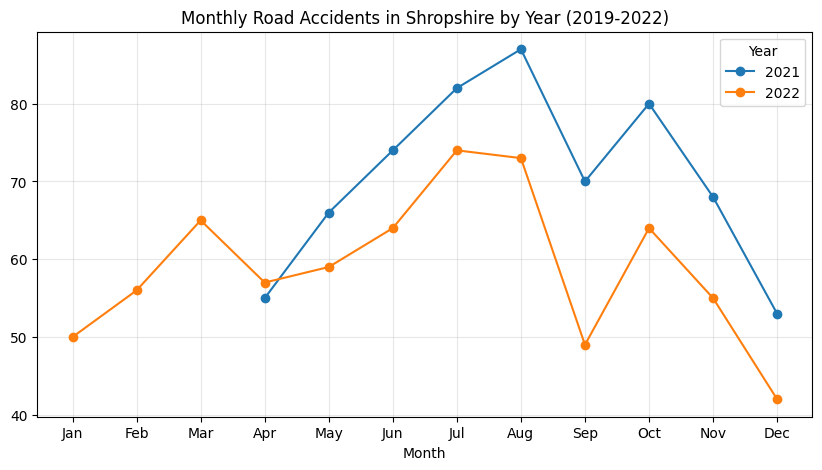

In [40]:
monthly_shropshire_df = shropshire_df.groupby(['Year', 'Month']).size()

monthly_shropshire_df = monthly_shropshire_df.unstack(level=0)

monthly_shropshire_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Shropshire by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

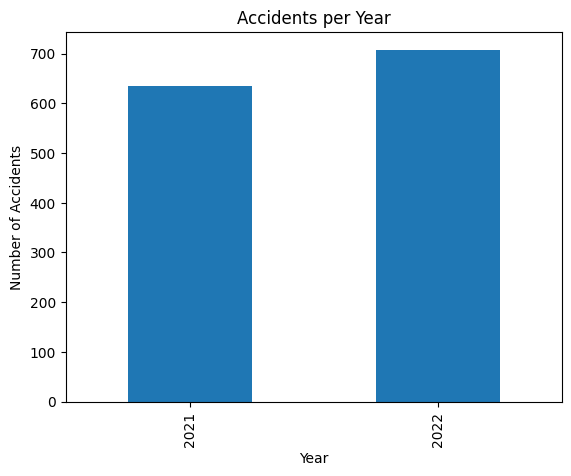

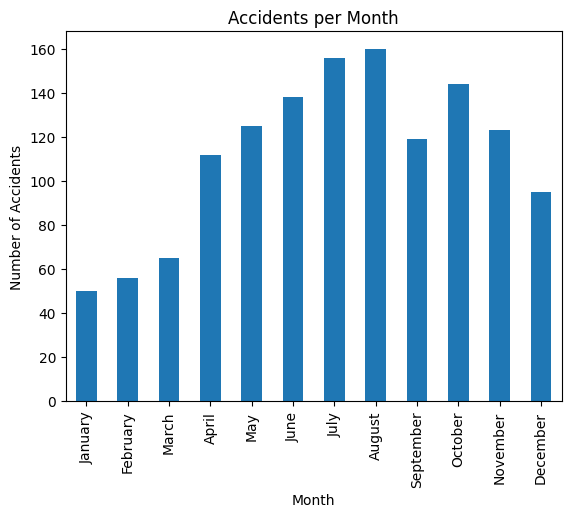

DayOfWeek
Monday       193
Tuesday      199
Wednesday    183
Thursday     185
Friday       174
Saturday     225
Sunday       184
Name: count, dtype: int64


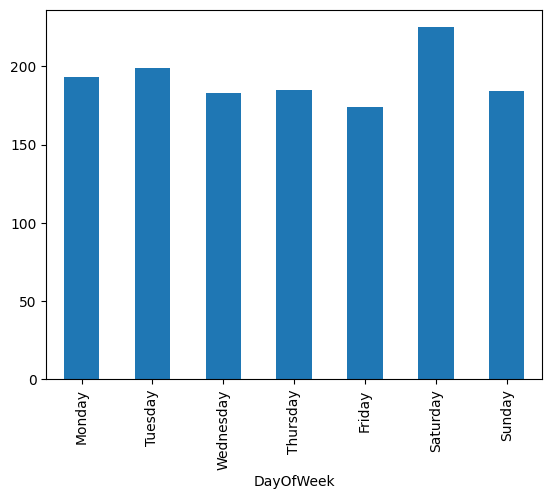

In [41]:
# Accidents per year
accidents_per_year = shropshire_df['Year'].value_counts().sort_index()
accidents_per_month = shropshire_df['Month'].value_counts().sort_index()
accidents_per_day = shropshire_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

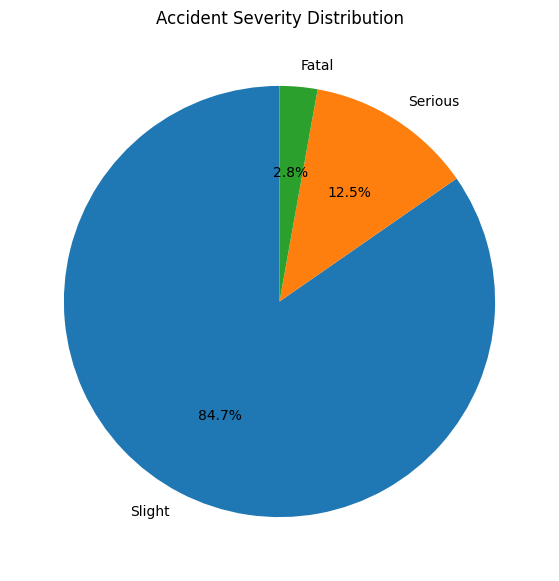

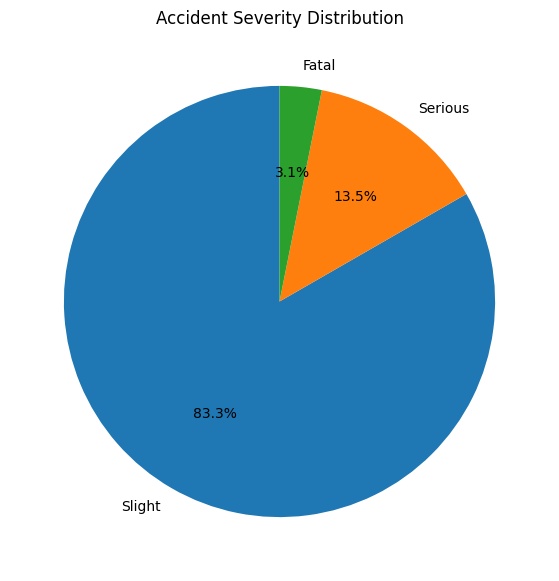

In [42]:
severity_shropshire  = shropshire_df['Accident_Severity'].value_counts()

plt.pie(severity_shropshire,
        labels = severity_shropshire.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_shropshire = shropshire_df[shropshire_df['Year'] == 2021]
# severity_2021
lsc_2021 = severity_2021_shropshire['Accident_Severity'].value_counts()

plt.pie(lsc_2021,
        labels = lsc_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1>Heat Map</h1>

In [43]:
import folium
from folium.plugins import HeatMap

locations = list(zip(shropshire_df['Latitude'], shropshire_df['Longitude']))

m = folium.Map(location=[shropshire_df['Latitude'].mean(), shropshire_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m) #add heatmap layer

m.save('accident_heatmap.html') #save the map as an html file
m #display the map in jupyter notebook

<h1>Using District Area to make a comparison to a general result </h1>
<h3>Isle of Wight Analysis</h3>
<img src = 'https://ichef.bbci.co.uk/news/976/cpsprodpb/135D1/production/_120531397_iowgettyimages-1272579144.jpg'>

In [44]:
# df.dtypes
islewight_df = accident_df[accident_df['District Area'] == 'Isle of Wight']

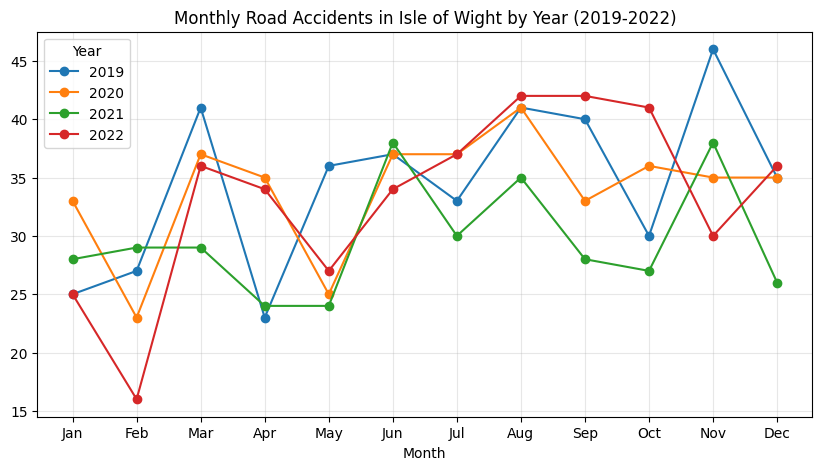

In [45]:
monthly_islewight_df = islewight_df.groupby(['Year', 'Month']).size()

monthly_islewight_df = monthly_islewight_df.unstack(level=0)

monthly_islewight_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Isle of Wight by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

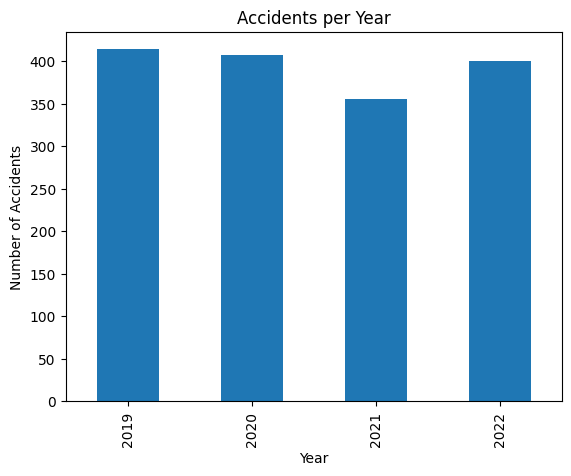

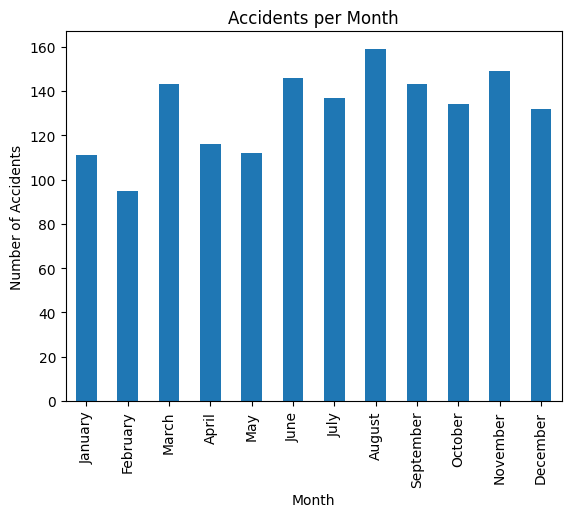

DayOfWeek
Monday       178
Tuesday      239
Wednesday    225
Thursday     254
Friday       237
Saturday     271
Sunday       173
Name: count, dtype: int64


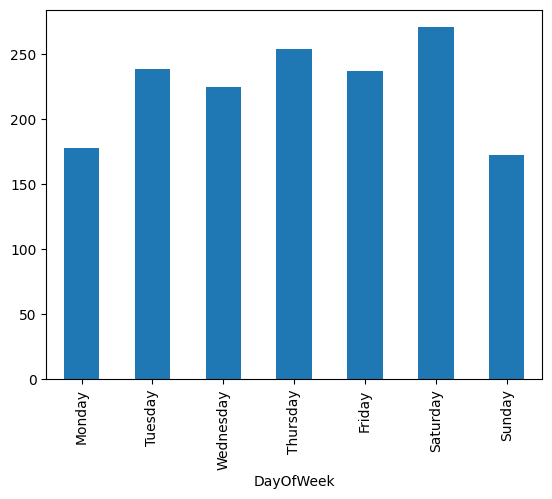

In [46]:
# Accidents per year
accidents_per_year = islewight_df['Year'].value_counts().sort_index()
accidents_per_month = islewight_df['Month'].value_counts().sort_index()
accidents_per_day = islewight_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

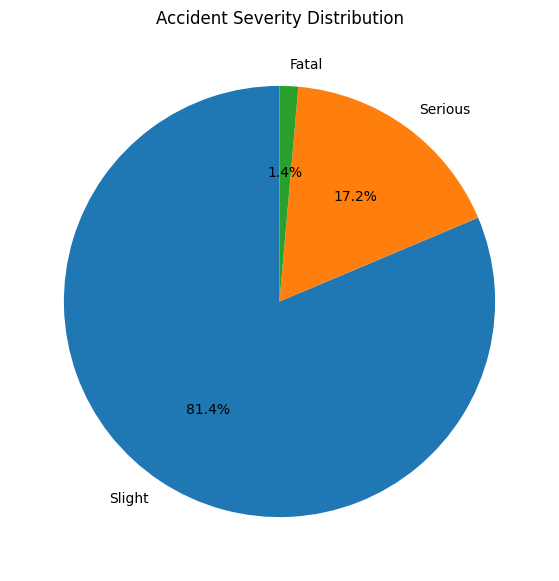

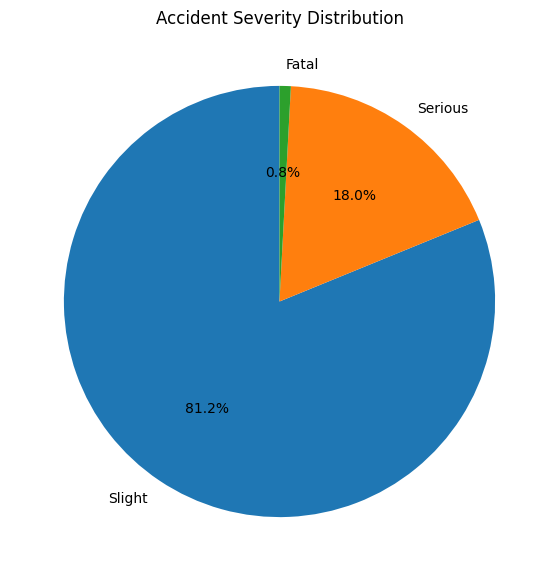

In [47]:
severity_islewight  = islewight_df['Accident_Severity'].value_counts()

plt.pie(severity_islewight,
        labels = severity_islewight.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_islewight = islewight_df[islewight_df['Year'] == 2021]
# severity_2021
lsc_2021 = severity_2021_islewight['Accident_Severity'].value_counts()

plt.pie(lsc_2021,
        labels = lsc_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1>Heat Map</h1>

In [48]:
import folium
from folium.plugins import HeatMap

locations = list(zip(islewight_df['Latitude'], islewight_df['Longitude']))

m = folium.Map(location=[islewight_df['Latitude'].mean(), islewight_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m) #add heatmap layer

m.save('accident_heatmap.html') #save the map as an html file
m #display the map in jupyter notebook

<h1>Using District Area to make a comparison to a general result </h1>
<h3>Mid Bedfordshire Analysis</h3>
<img src = 'https://ichef.bbci.co.uk/news/976/cpsprodpb/B4E9/production/_131331364_midbedsaerial1.jpg'>

In [49]:
# df.dtypes
midbedfordshire_df = accident_df[accident_df['District Area'] == 'Mid Bedfordshire']

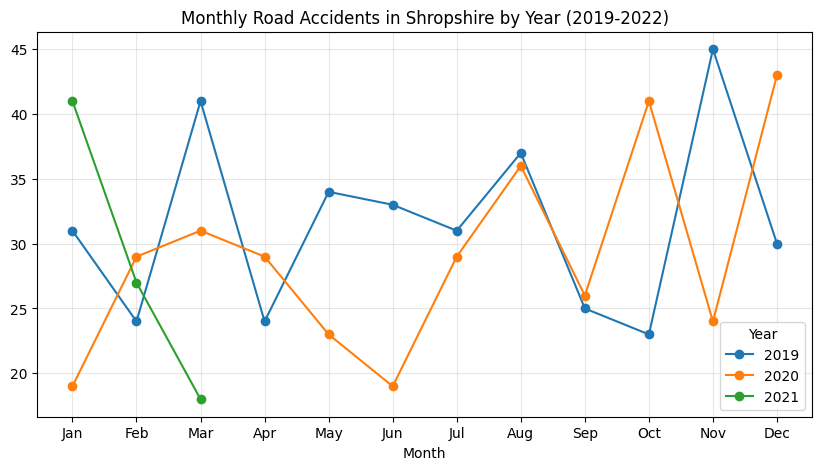

In [50]:
monthly_midbedfordshire_df = midbedfordshire_df.groupby(['Year', 'Month']).size()

monthly_midbedfordshire_df = monthly_midbedfordshire_df.unstack(level=0)

monthly_midbedfordshire_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Shropshire by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

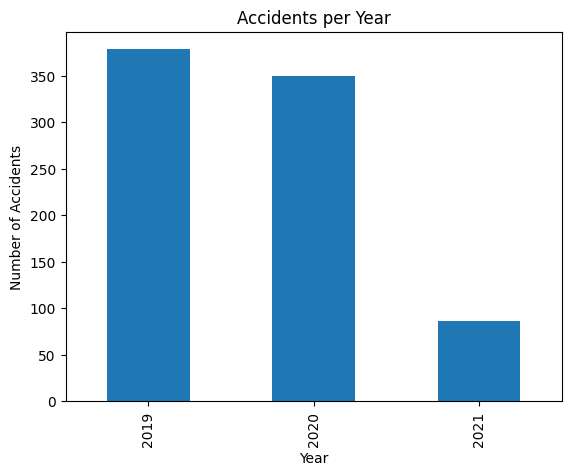

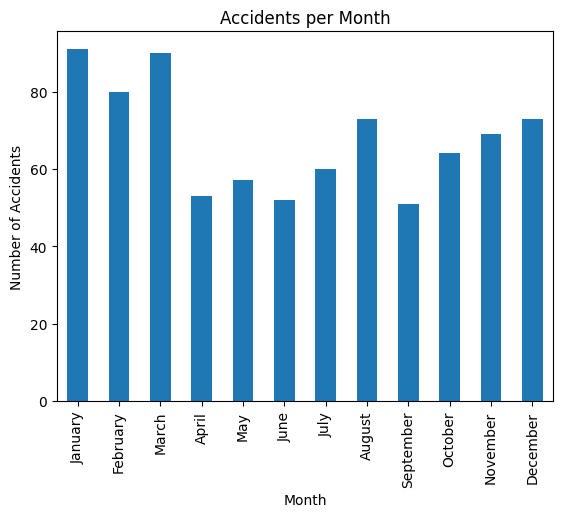

DayOfWeek
Monday       115
Tuesday      117
Wednesday    107
Thursday     130
Friday       116
Saturday     101
Sunday       127
Name: count, dtype: int64


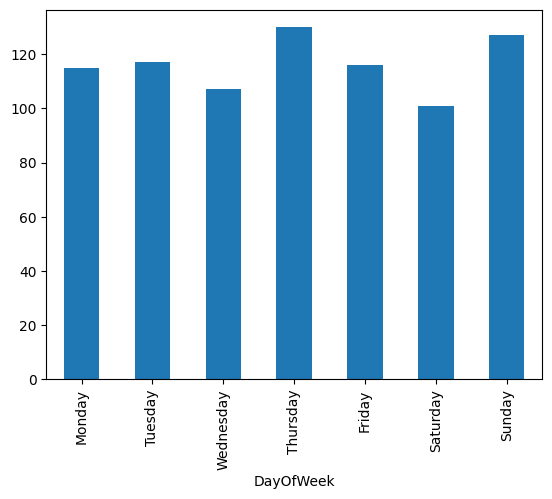

In [51]:
# Accidents per year
accidents_per_year = midbedfordshire_df['Year'].value_counts().sort_index()
accidents_per_month = midbedfordshire_df['Month'].value_counts().sort_index()
accidents_per_day = midbedfordshire_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

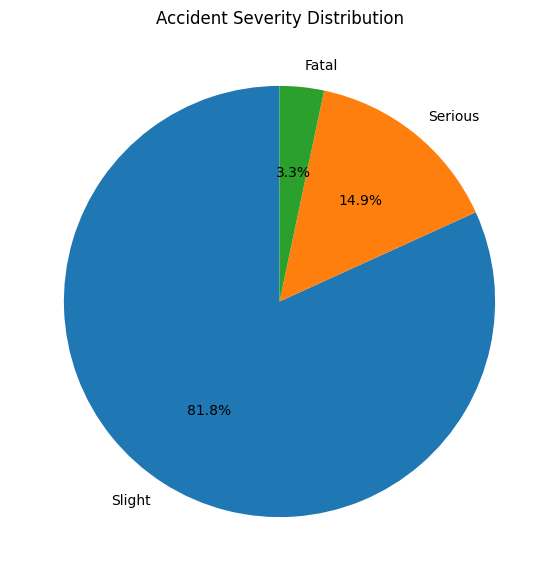

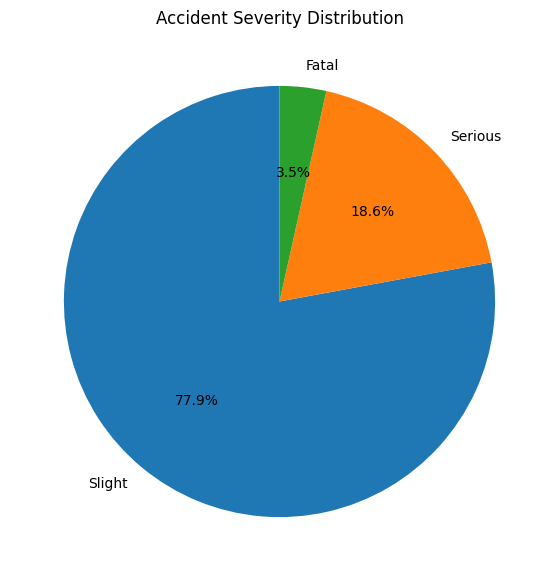

In [52]:
severity_midbedfordshire  = midbedfordshire_df['Accident_Severity'].value_counts()

plt.pie(severity_midbedfordshire,
        labels = severity_midbedfordshire.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_midbedfordshire = midbedfordshire_df[midbedfordshire_df['Year'] == 2021]
# severity_2021
lsc_2021 = severity_2021_midbedfordshire['Accident_Severity'].value_counts()

plt.pie(lsc_2021,
        labels = lsc_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

<h1>Heat Map </h1>

In [53]:
import folium
from folium.plugins import HeatMap

locations = list(zip(midbedfordshire_df['Latitude'], midbedfordshire_df['Longitude']))

m = folium.Map(location=[midbedfordshire_df['Latitude'].mean(), midbedfordshire_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m) #add heatmap layer

m.save('accident_heatmap.html') #save the map as an html file
m #display the map in jupyter notebook

<h1>Using District Area to make a comparison to a general result </h1>
<h3>Glasgow City Analysis</h3>
<img src = 'https://media.gettyimages.com/id/1205363274/photo/wide-angle-aerial-view-of-the-river-clyde-and-landmarks-glasgow-scotland-uk.jpg?b=1&s=170667a&w=0&k=20&c=o1Vd3Pk8JsclgVNYcPrDfFMimnEe2kH_c8vV9haUvZs='>

In [54]:
glasgow_df = accident_df[accident_df['District Area'] == 'Glasgow City']

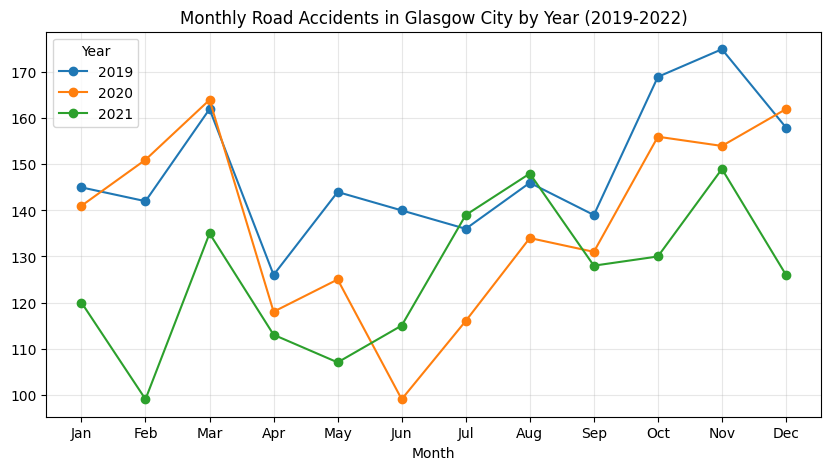

In [55]:
monthly_glasgow_df = glasgow_df.groupby(['Year', 'Month']).size()

monthly_glasgow_df = monthly_glasgow_df.unstack(level=0)

monthly_glasgow_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Glasgow City by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

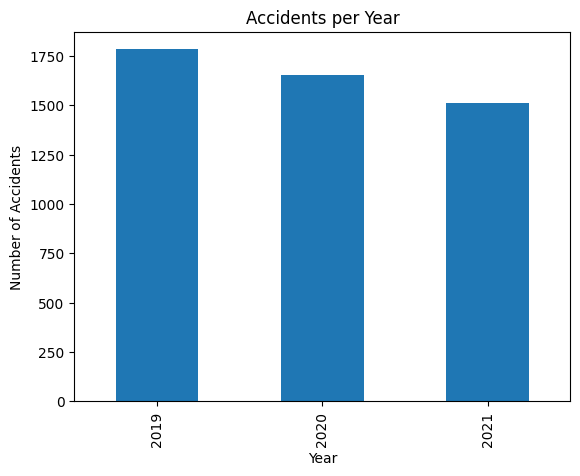

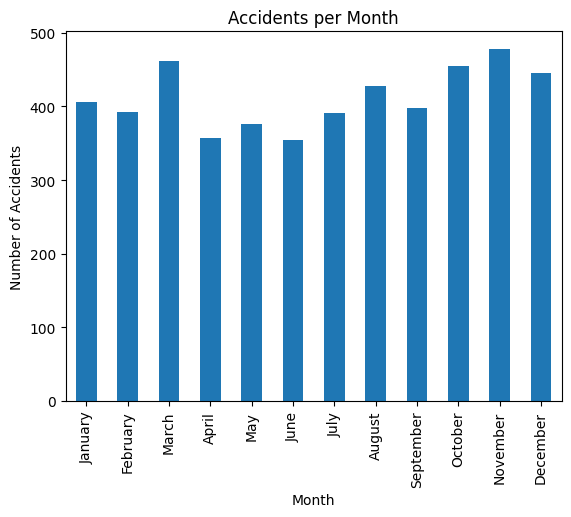

DayOfWeek
Monday       522
Tuesday      732
Wednesday    709
Thursday     735
Friday       738
Saturday     820
Sunday       686
Name: count, dtype: int64


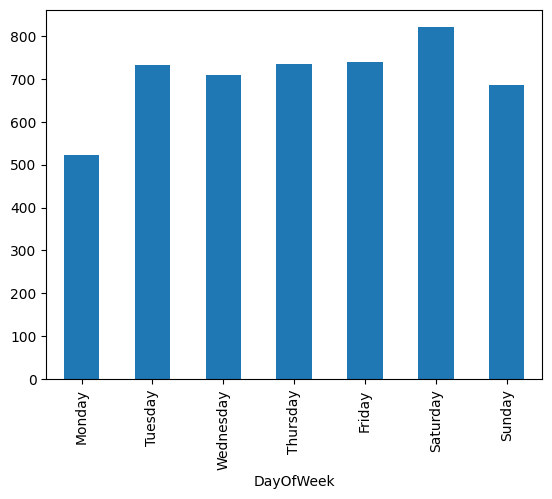

In [56]:
# Accidents per year
accidents_per_year = glasgow_df['Year'].value_counts().sort_index()
accidents_per_month = glasgow_df['Month'].value_counts().sort_index()
accidents_per_day = glasgow_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

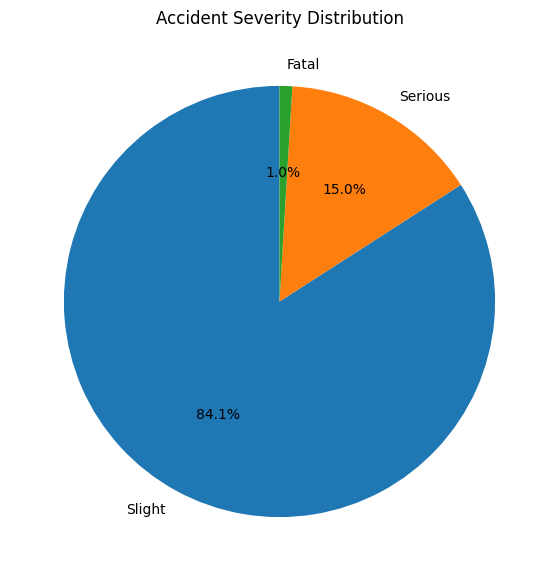

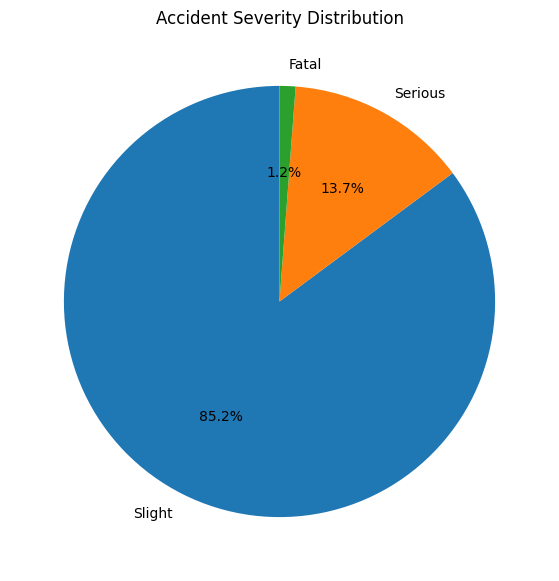

In [57]:
severity_glasgow_df  = glasgow_df['Accident_Severity'].value_counts()

plt.pie(severity_glasgow_df,
        labels = severity_glasgow_df.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_glasgow_df = glasgow_df[glasgow_df['Year'] == 2021]
# severity_2021
lsc_2021 = severity_2021_glasgow_df['Accident_Severity'].value_counts()

plt.pie(lsc_2021,
        labels = lsc_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

In [58]:
import folium
from folium.plugins import HeatMap

locations = list(zip(glasgow_df['Latitude'], glasgow_df['Longitude']))

m = folium.Map(location=[glasgow_df['Latitude'].mean(), glasgow_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m) #add heatmap layer

m.save('accident_heatmap.html') #save the map as an html file
m #display the map in jupyter notebook

<h1>Using District Area to make a comparison to a general result </h1>
<h3>Southend-on-Sea Analysis</h3>
<img src = 'https://media.gettyimages.com/id/1308471066/photo/aerial-view-of-the-southend-pier-a-major-landmark-in-southend-on-sea-and-the-longest-pleasure.jpg?b=1&s=612x612&w=0&k=20&c=VfCHHFVV_thQzJNugqH7eM_xK0NMY4tvqxfC_4yiy8E='>

In [59]:
southend_df = accident_df[accident_df['District Area'] == 'Southend-on-Sea']

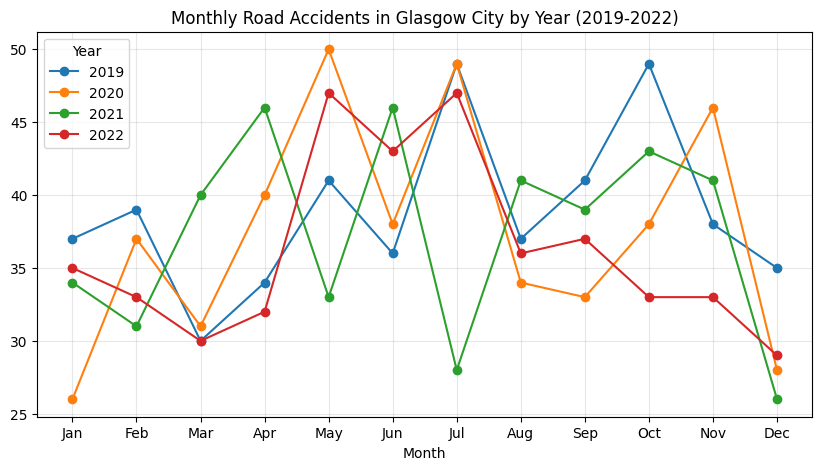

In [60]:
monthly_southend_df = southend_df.groupby(['Year', 'Month']).size()

monthly_southend_df = monthly_southend_df.unstack(level=0)

monthly_southend_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Glasgow City by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


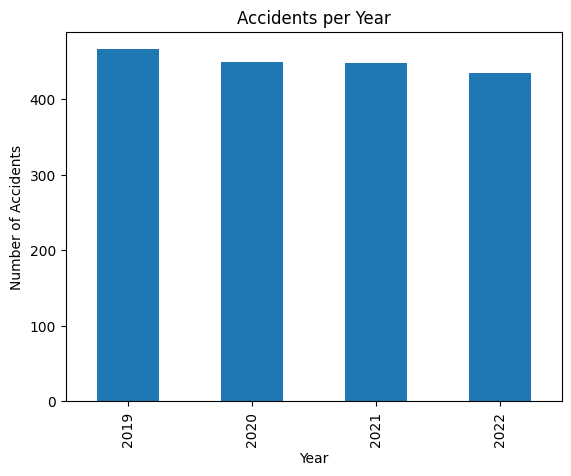

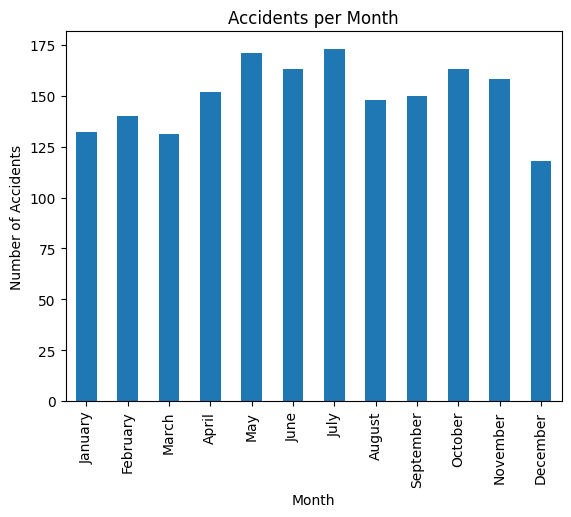

DayOfWeek
Monday       186
Tuesday      263
Wednesday    272
Thursday     240
Friday       287
Saturday     298
Sunday       253
Name: count, dtype: int64


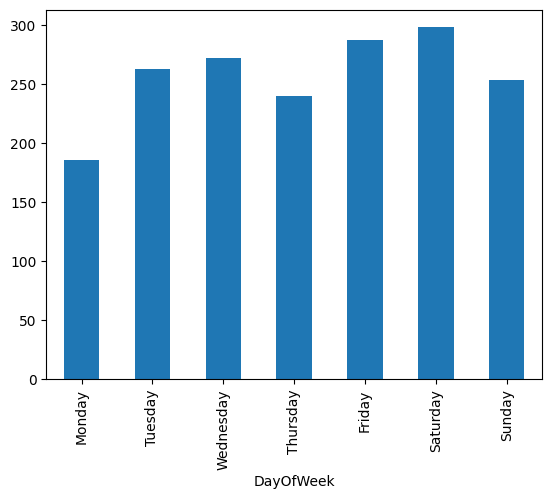

In [61]:
# Accidents per year
accidents_per_year = southend_df['Year'].value_counts().sort_index()
accidents_per_month = southend_df['Month'].value_counts().sort_index()
accidents_per_day = southend_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)


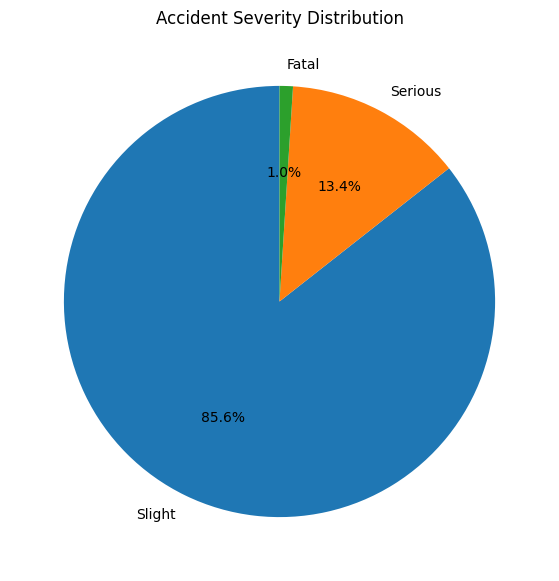

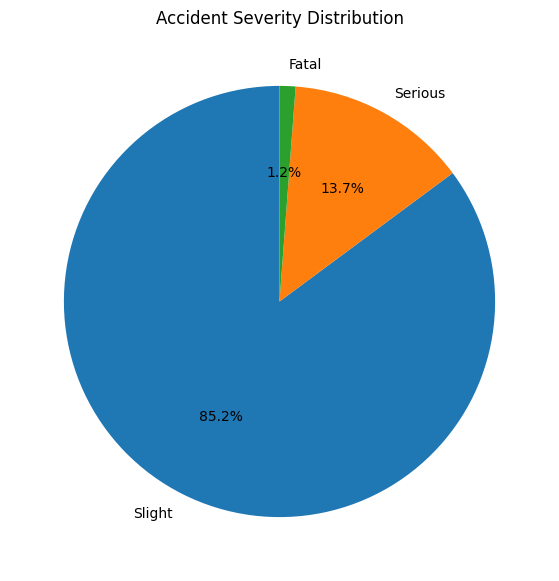

In [62]:
severity_southend_df  = southend_df['Accident_Severity'].value_counts()

plt.pie(severity_southend_df,
        labels = severity_southend_df.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_glasgow_df = glasgow_df[glasgow_df['Year'] == 2021]
# severity_2021
lsc_2021 = severity_2021_glasgow_df['Accident_Severity'].value_counts()

plt.pie(lsc_2021,
        labels = lsc_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


In [63]:
import folium
from folium.plugins import HeatMap

locations = list(zip(southend_df['Latitude'], southend_df['Longitude']))

m = folium.Map(location=[southend_df['Latitude'].mean(), southend_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m) #add heatmap layer

m.save('accident_heatmap.html') #save the map as an html file
m #display the map in jupyter notebook

<h1>Using District Area to make a comparison to a general result </h1>
<h3>Lichfield Analysis</h3>
<img src = 'https://th.bing.com/th/id/OSK.HEROwFkhGSvz7JI3ur7_IRBWD-MD8HgY6qNqLguC4oYAluo?r=0&o=7rm=3&rs=1&pid=ImgDetMain&o=7&rm=3'>

In [64]:
lichfield_df = accident_df[accident_df['District Area'] == 'Lichfield']

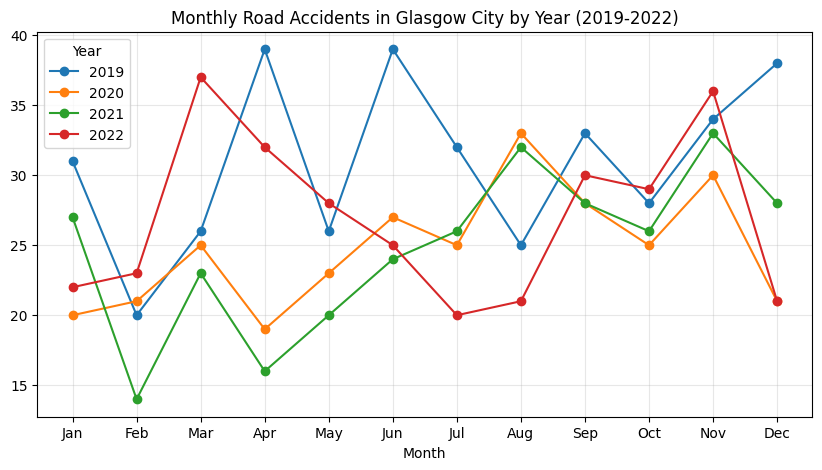

In [65]:
monthly_lichfield_df = lichfield_df.groupby(['Year', 'Month']).size()

monthly_lichfield_df = monthly_lichfield_df.unstack(level=0)

monthly_lichfield_df.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Glasgow City by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()


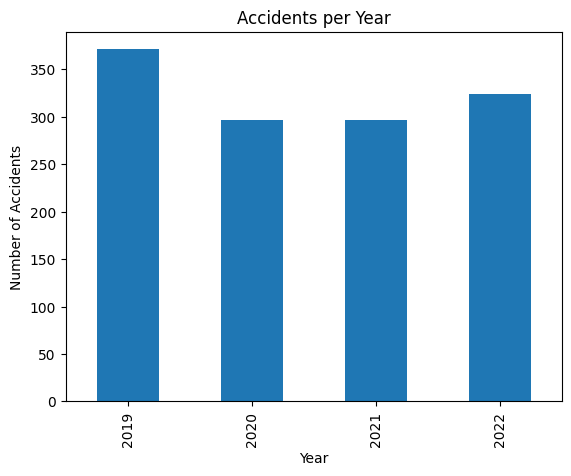

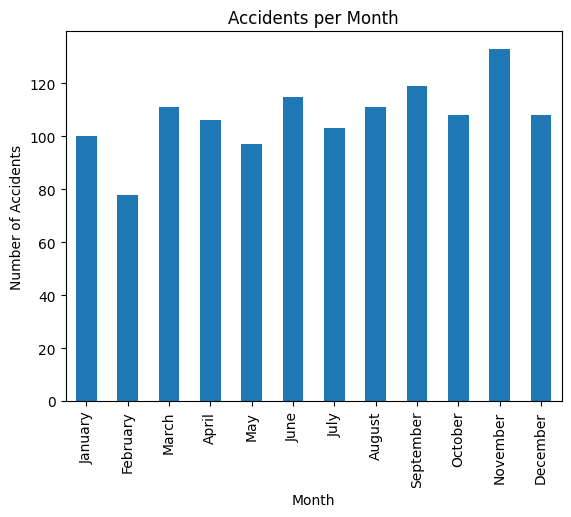

DayOfWeek
Monday       155
Tuesday      199
Wednesday    189
Thursday     168
Friday       189
Saturday     222
Sunday       167
Name: count, dtype: int64


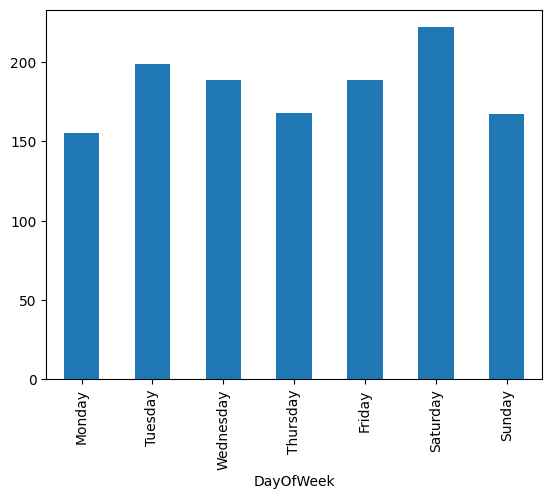

In [66]:
# Accidents per year
accidents_per_year = lichfield_df['Year'].value_counts().sort_index()
accidents_per_month = lichfield_df['Month'].value_counts().sort_index()
accidents_per_day = lichfield_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)


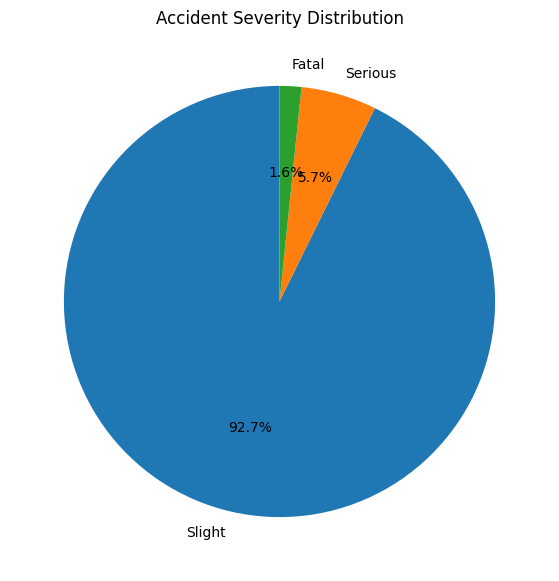

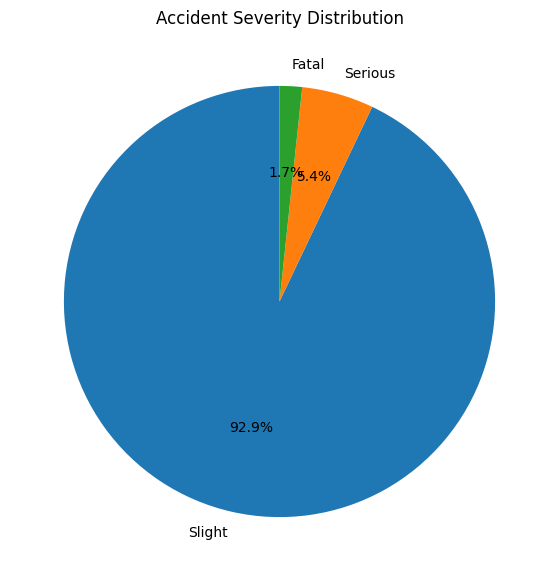

In [67]:
severity_lichfield_df  = lichfield_df['Accident_Severity'].value_counts()

plt.pie(severity_lichfield_df,
        labels = severity_lichfield_df.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_lichfield_df= lichfield_df[lichfield_df['Year'] == 2021]
# severity_2021
lsc_2021 = severity_2021_lichfield_df['Accident_Severity'].value_counts()

plt.pie(lsc_2021,
        labels = lsc_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()


In [68]:
import folium
from folium.plugins import HeatMap

locations = list(zip(lichfield_df['Latitude'], lichfield_df['Longitude']))

m = folium.Map(location=[lichfield_df['Latitude'].mean(), lichfield_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m) #add heatmap layer

m.save('accident_heatmap.html') #save the map as an html file
m #display the map in jupyter notebook